In [76]:
# Useful imports
import csv as csv
import pandas as pd
import numpy as np

import pylab as P

from sklearn.ensemble import RandomForestClassifier

In [57]:
# Read training data from file
df = pd.read_csv('./datasets/train.csv', header=0)

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [58]:
df[df['Age'].isnull()][['Sex', 'Pclass', 'Age']]

# Print number of men in eash class whose age is not present
for i in range(1,4):
    print i, len(df[ (df['Sex'] != 'female') & (df['Pclass'] == i) ])

1 122
2 108
3 347


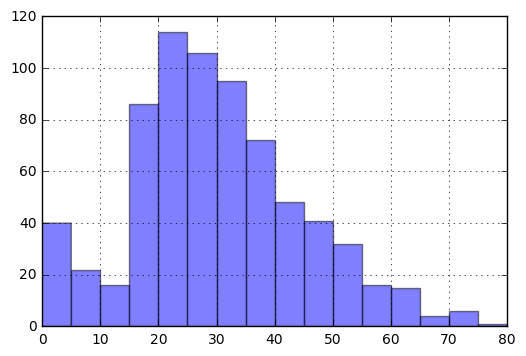

In [59]:
# Show a histogram for all non-null ages
df['Age'].dropna().hist(bins=16, range=(0,80), alpha = .5)
P.show()

In [60]:
# Create gender numerous column
df['Gender'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  
0      0         A/5 21171   7.2500   NaN        S       1  
1      0          PC 17599  71.2833   C85        C       0  
2      0  STON/O2. 3101282   7.9250   NaN        S       0

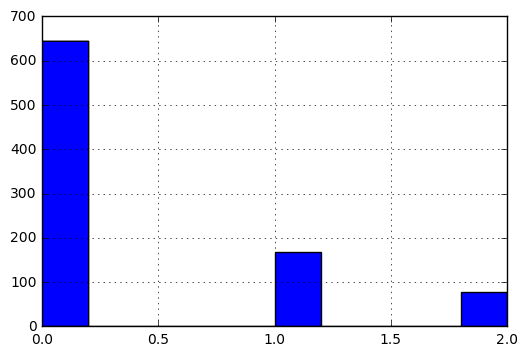

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  Gender  Station  
0      0         A/5 21171   7.2500   NaN        S       1        0  
1      0          PC 17599  71.2833   C85        C       0        1  
2      0  STON/O2. 3101282   7.9250   NaN        S       0        0

In [61]:
# Create station numerous column (NA values are set to 0 as it's the most likely)
df[ df['Embarked'].isnull() ]

df['Station'] = df['Embarked'].dropna().map( {'S': 0, 'C': 1, 'Q': 2} )
df['Station'].dropna().hist()
P.show()

df['Station'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).fillna(0).astype(int)
df.head(3)

In [62]:
# Create new age column and fill all null values there by median age basing on sex and class
median_ages = np.zeros((2,3))

for i in range(0,2):
    for j in range(0,3):
        median_ages[i,j] = df[ (df['Gender'] == i) & (df['Pclass'] == j+1) ]['Age'].dropna().median() 
        
median_ages

df['AgeFill'] = df['Age']
df.head()

for i in range(0,2):
    for j in range(0,3):
        df.loc[ (df['Age'].isnull()) & (df['Gender'] == i) & (df['Pclass'] == j+1), 'AgeFill' ] = median_ages[i,j]
        
df['AgeIsNull'] = pd.isnull(df['Age']).astype(int)
        
df[ df['Age'].isnull() ][['Gender', 'Pclass', 'Age', 'AgeFill', 'AgeIsNull']].head(10)

Gender  Pclass  Age  AgeFill  AgeIsNull
5        1       3  NaN     25.0          1
17       1       2  NaN     30.0          1
19       0       3  NaN     21.5          1
26       1       3  NaN     25.0          1
28       0       3  NaN     21.5          1
29       1       3  NaN     25.0          1
31       0       1  NaN     35.0          1
32       0       3  NaN     21.5          1
36       1       3  NaN     25.0          1
42       1       3  NaN     25.0          1

In [63]:
df.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000         NaN    0.000000   
50%     446.000000    0.000000    3.000000         NaN    0.000000   
75%     668.500000    1.000000    3.000000         NaN    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare      Gender     Station     AgeFill   AgeIsNull  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.647587    0.361392   29.112424    0.198653  
std      0.806057   49.693429    0.477989    0.635675   13.304424    0.399212  
min      0.000000    0.000000    0.000000    0.000000    0.420000    0.000000  
25%      0.000000    7.910400    0.000000    0.000000   21.500000    0.000000  
50%      0.000000   14.454200    1.000000    0.000000   26.000000    0.000000  
75%      0.000000   31.000000    1.000000    1.000000   36.000000    0.000000  
max      6.000000  512.329200    1.000000    2.000000   80.000000    1.000000

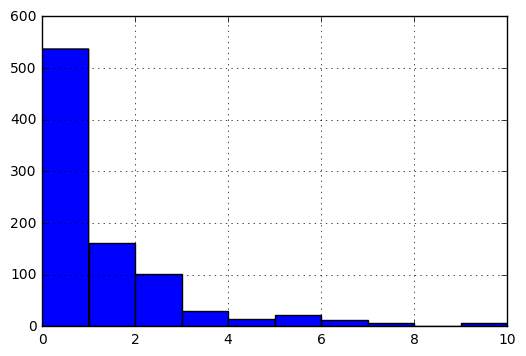

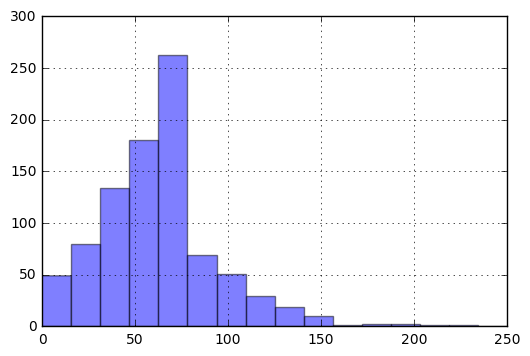

In [64]:
# Some feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch']

df['Age*Class'] = df['AgeFill'] * df['Pclass']

df['FamilySize'].hist()
P.show()
df['Age*Class'].hist(bins=16, range=(0,250), alpha = .5)
P.show()

In [65]:
# Drop unnecessary columns
df.dtypes[df.dtypes.map( lambda x: x == 'object' )]

df = df.drop(df[['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Gender        891 non-null int32
Station       891 non-null int32
AgeFill       891 non-null float64
AgeIsNull     891 non-null int32
FamilySize    891 non-null int64
Age*Class     891 non-null float64
dtypes: float64(3), int32(3), int64(5)
memory usage: 66.2 KB


In [66]:
# Convert data to an array
train_data = df.values
train_data

array([[  0. ,   3. ,   1. , ...,   0. ,   1. ,  66. ],
       [  1. ,   1. ,   1. , ...,   0. ,   1. ,  38. ],
       [  1. ,   3. ,   0. , ...,   0. ,   0. ,  78. ],
       ..., 
       [  0. ,   3. ,   1. , ...,   1. ,   3. ,  64.5],
       [  1. ,   1. ,   0. , ...,   0. ,   0. ,  26. ],
       [  0. ,   3. ,   0. , ...,   0. ,   0. ,  96. ]])

In [67]:
forest = RandomForestClassifier(n_estimators=100)

# Train model
forest = forest.fit(train_data[0::,1::], train_data[0::,0])

In [84]:
# Load test_data
df_test = pd.read_csv('./datasets/test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [85]:
# Create gender numerous column
df_test['Gender'] = df_test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Create station numerous column (NA values are set to 0)
df_test['Station'] = df_test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Fill age with median values
df_test['AgeFill'] = df_test['Age']

for i in range(0,2):
    for j in range(0,3):
        df_test.loc[ (df_test['Age'].isnull()) & (df_test['Gender'] == i) & (df_test['Pclass'] == j+1), 'AgeFill' ] = median_ages[i,j]
        
df_test['AgeIsNull'] = pd.isnull(df_test['Age']).astype(int)

# Fill fare with average value according to class
mean_fare = np.zeros((1,3))
for i in range(0,3):
    mean_fare[0,i] = df[ df['Pclass'] == i+1 ]['Fare'].mean()

for j in range(0,3):
    df_test.loc[ (df_test['Fare'].isnull()) & (df_test['Pclass'] == j+1), 'Fare' ] = mean_fare[0, j]
        
df_test[ df_test['Fare'].isnull() ]

Empty DataFrame
Columns: [PassengerId, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Gender, Station, AgeFill, AgeIsNull]
Index: []

In [86]:
# Some feature engineering
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']
df_test['Age*Class'] = df_test['AgeFill'] * df_test['Pclass']

In [87]:
# Drop unnecessary columns
df_test_clean = df_test.drop(df_test[['PassengerId', 'Name', 'Sex', 'Age', 'Ticket', 'Cabin', 'Embarked']], axis=1)
df_test_clean.head(3)

Pclass  SibSp  Parch    Fare  Gender  Station  AgeFill  AgeIsNull  \
0       3      0      0  7.8292       1        2     34.5          0   
1       3      1      0  7.0000       0        0     47.0          0   
2       2      0      0  9.6875       1        2     62.0          0   

   FamilySize  Age*Class  
0           0      103.5  
1           1      141.0  
2           0      124.0

In [88]:
# Convert data to an array
test_data = df_test_clean.values
test_data

array([[   3. ,    0. ,    0. , ...,    0. ,    0. ,  103.5],
       [   3. ,    1. ,    0. , ...,    0. ,    1. ,  141. ],
       [   2. ,    0. ,    0. , ...,    0. ,    0. ,  124. ],
       ..., 
       [   3. ,    0. ,    0. , ...,    0. ,    0. ,  115.5],
       [   3. ,    0. ,    0. , ...,    1. ,    0. ,   75. ],
       [   3. ,    1. ,    1. , ...,    1. ,    2. ,   75. ]])

In [95]:
# Predict results
output = forest.predict(test_data)

# Save to the file
predictions_file = open('genderclassmodel-random-forest.csv', 'wb')
p = csv.writer(predictions_file)
p.writerow(['PassengerId','Survived'])

for i in xrange(len(output)):
    p.writerow([df_test.loc[i,'PassengerId'], "%d" % output[i]])

predictions_file.close()